## PCA

Text(0, 0.5, 'PC2')

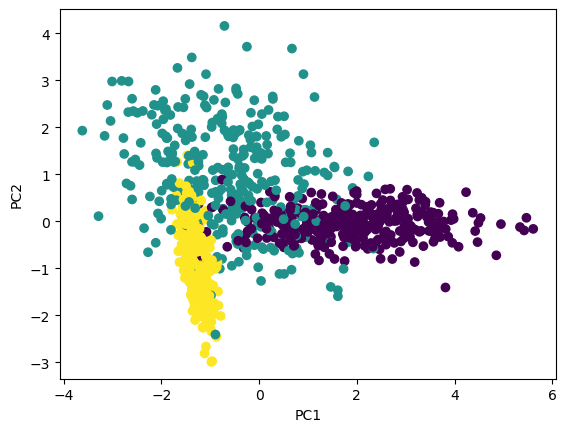

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 生成类别数据
X, Y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_clusters_per_class=1, random_state=22)

# 标准化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# 可视化
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y)
plt.title("PCA with 3 Classes")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 构造或导入样本数据（二维为例）
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

# 2. 标准化数据
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

# 3. 计算协方差矩阵
cov_matrix = np.cov(X_norm.T)

# 4. 特征值分解
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# 5. 选择前k个主成分（按特征值大小排序）
k = 1
sorted_indices = np.argsort(eig_vals)[::-1]
topk_eig_vecs = eig_vecs[:, sorted_indices[:k]]

# 6. 投影到主成分空间
Z = X_norm @ topk_eig_vecs

# 7. 可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(X_norm[:, 0], X_norm[:, 1], label='Original Data')
for i in range(len(X)):
    plt.plot([X_norm[i, 0], Z[i, 0] * topk_eig_vecs[0]],
             [X_norm[i, 1], Z[i, 0] * topk_eig_vecs[1]],
             'r--', alpha=0.5)
plt.quiver(0, 0, topk_eig_vecs[0], topk_eig_vecs[1],
           angles='xy', scale_units='xy', scale=1, color='r', label='PC1')
plt.axis('equal')
plt.legend()
plt.title('PCA Projection (1D)')
plt.grid(True)
plt.show()


## LDA

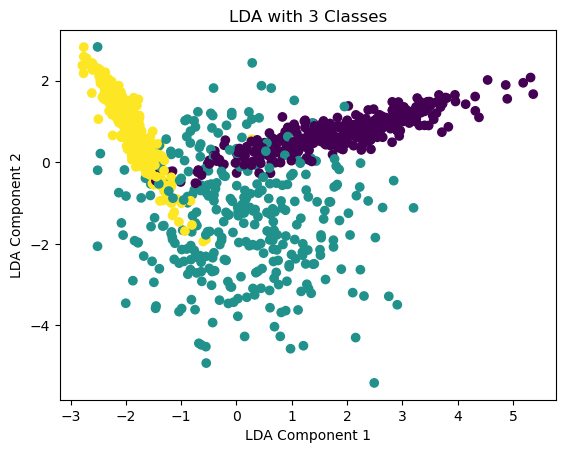

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 生成类别数据
X, Y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_clusters_per_class=1, random_state=22)

# lda
# n_components <= n_classes - 1
lda = LinearDiscriminantAnalysis(n_components=2)
X_transform = lda.fit_transform(X, Y)


# 可视化
plt.scatter(X_transform[:, 0], X_transform[:, 1], c=Y)
plt.title("LDA with 3 Classes")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.show()

## t-SNE

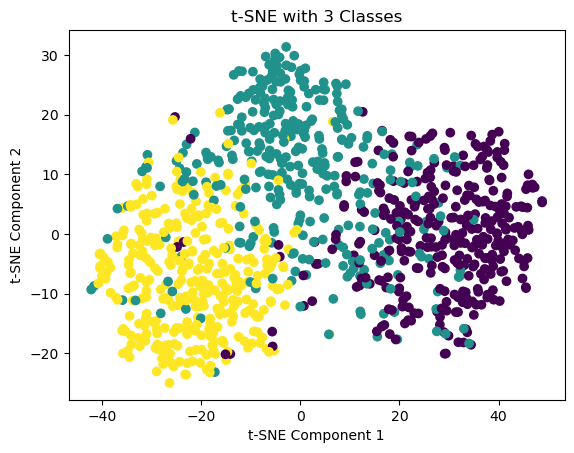

In [23]:
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 生成类别数据
X, Y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_clusters_per_class=1, random_state=22)

# tsne
t_sne = TSNE(n_components=2, perplexity=30)
X_transform = t_sne.fit_transform(X)


# 可视化
plt.scatter(X_transform[:, 0], X_transform[:, 1], c=Y)
plt.title("t-SNE with 3 Classes")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

## Autoencoder

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 1.1433 - val_loss: 1.0624
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 1.0134 - val_loss: 1.0112
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9667 - val_loss: 0.9803
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9294 - val_loss: 0.9522
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8912 - val_loss: 0.9216
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8519 - val_loss: 0.8909
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8143 - val_loss: 0.8624
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7778 - val_loss: 0.8358
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7452 - val_loss: 0.8123
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7154 - val_loss: 0.7914
Epoch 11/

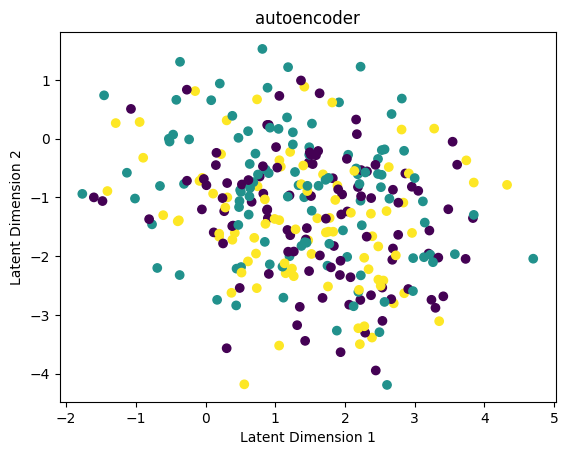

In [8]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 生成类别数据
X, Y = make_classification(n_samples=1000, n_features=64, n_classes=3, n_clusters_per_class=1, random_state=22)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=22)


# 编码器
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(64,)),
    tf.keras.layers.Dense(32)
])

# 解码器
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(32,)),
    tf.keras.layers.Dense(64)
])

# 自编码器
autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train, x_train, epochs=100, batch_size=32, validation_split=0.2)

# 提取潜在表示
latent_rep = encoder.predict(x_test)

# 可视化表示
plt.scatter(latent_rep[:, 0], latent_rep[:, 1], c=y_test)
plt.title("autoencoder")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()

## HMM

In [ ]:
import numpy as np

class HMM:
    def __init__(self, initial_prob, states, observations, \
                 transition_prob, emission_prob):
        self.states = states
        self.observations = observations
        self.transition_prob = np.array(transition_prob)
        self.emission_prob = np.array(emission_prob)
        self.initial_prob = np.array(initial_prob)

    def forward_algorithm(self, observation_sequence):
        '''
        前向算法
        @param observation_sequence: 观测序列
        @param return: 观测序列的概率
        '''
        observation_index = [self.observations.index(obs) for obs in observation_sequence]

        T = len(observation_sequence)
        N = len(self.states)
        alpha = np.zeros((T, N))

        alpha[0, :] = self.initial_prob * self.emission_prob[:, observation_index[0]]
        for t in range(1, T):
            for j in range(N):
                probs = alpha[t - 1, :] * self.transition_prob[:, j]
                alpha[t, j] = np.sum(probs) * self.emission_prob[j, observation_index[t]]

        return np.sum(alpha[-1, :])
    
    def backward_algorithm(self, observation_sequence):
        """
        后向算法计算后向变量
        :param observation_sequence: 观测序列
        :return: 后向变量
        """
        # 将观测序列映射为索引
        observation_indices = [self.observations.index(obs) for obs in observation_sequence]
        
        # 初始化后向变量
        T = len(observation_sequence)
        N = len(self.states)
        beta = np.zeros((T, N))
        
        # 初始化最后一列
        beta[-1, :] = 1
        
        # 动态规划计算后向变量
        for t in range(T-2, -1, -1):
            for i in range(N):
                beta[t, i] = np.sum(self.transition_prob[i, :] * self.emission_prob[:, observation_indices[t+1]] * beta[t+1, :])
        
        return beta


    def viterbi_algorithm(self, observation_sequence):
        '''
        维特比算法找到最有可能的状态序列
        @param observation_sequence: 观测序列
        @return: 最有可能的状态序列
        '''
        observation_index = [self.observations.index(obs) for obs in observation_sequence]
        
        T = len(observation_sequence)
        N = len(self.states)
        alpha = np.zeros((T, N))
        psi = np.zeros((T, N), dtype=int)

        alpha[0, :] = self.initial_prob * self.emission_prob[:, observation_index[0]]
        for t in range(1, T):
            for j in range(N):
                probs = alpha[t - 1, :] * self.transition_prob[:, j]
                alpha[t, j] = np.max(probs) * self.emission_prob[j, observation_index[t]]
                psi[t, j] = np.argmax(probs)

        best_path = [np.argmax(alpha[-1, :])]
        for t in range(T - 1, 0 , -1):
            best_path.insert(0, psi[t, best_path[0]])

        best_path = [self.states[i] for i in best_path]
        return best_path

    def baum_welch_algorithm(self, observation_sequence, max_iter=100, tol=1e-5):
        """
        鲍姆-韦尔奇算法估计 HMM 的参数
        @param observation_sequence: 观测序列
        @param max_iter: 最大迭代次数
        @param tol: 收敛阈值
        @return: 更新后的转移概率矩阵、发射概率矩阵和初始状态概率分布
        """
        # 将观测序列映射为索引
        observation_indices = [self.observations.index(obs) for obs in observation_sequence]
        
        T = len(observation_sequence)
        N = len(self.states)
        
        for iteration in range(max_iter):
            # E-step: 计算前向和后向变量
            alpha = self.forward_algorithm(observation_sequence)
            beta = self.backward_algorithm(observation_sequence)
            
            # 计算状态概率和转移概率
            gamma = np.zeros((T, N))
            xi = np.zeros((T-1, N, N))
            for t in range(T-1):
                denom = np.sum(np.sum(alpha[t, :].reshape(-1, 1) * self.transition_prob * self.emission_prob[:, observation_indices[t+1]].reshape(1, -1) * beta[t+1, :].reshape(1, -1)))
                for i in range(N):
                    for j in range(N):
                        xi[t, i, j] = alpha[t, i] * self.transition_prob[i, j] * self.emission_prob[j, observation_indices[t+1]] * beta[t+1, j] / denom
            for t in range(T):
                gamma[t, :] = np.sum(xi[t, :, :], axis=1)
            
            # M-step: 更新参数
            new_initial_prob = gamma[0, :]
            new_transition_prob = np.sum(xi, axis=0) / np.sum(gamma[:-1, :], axis=0).reshape(-1, 1)
            new_emission_prob = np.zeros((N, len(self.observations)))
            for j in range(N):
                for k in range(len(self.observations)):
                    new_emission_prob[j, k] = np.sum(gamma[observation_indices == k, j]) / np.sum(gamma[:, j])
            
            # 检查收敛
            if np.linalg.norm(new_transition_prob - self.transition_prob) < tol and np.linalg.norm(new_emission_prob - self.emission_prob) < tol:
                break
            
            # 更新参数
            self.initial_prob = new_initial_prob
            self.transition_prob = new_transition_prob
            self.emission_prob = new_emission_prob
        
        return self.transition_prob, self.emission_prob, self.initial_prob


# 定义状态和观测集合
states = ['Sunny', 'Rainy']
observations = ['Walk', 'Shop', 'Clean']

# 定义转移概率矩阵
transition_prob = [
    [0.7, 0.3],
    [0.4, 0.6]
]

# 定义发射概率矩阵
emission_prob = [
    [0.1, 0.4, 0.5],
    [0.6, 0.3, 0.1]
]

# 定义初始状态概率分布
initial_prob = [0.6, 0.4]

# 创建 HMM 实例
hmm = HMM(states)   


## GANs

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# 定义生成器
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# 定义判别器
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        return self.model(img_flat)

# 初始化模型
generator = Generator()
discriminator = Discriminator()

# 定义损失函数和优化器
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002)

# 训练循环
for epoch in range(100):
    for i, (real_imgs, _) in enumerate(data_loader):
        # 训练判别器
        optimizer_d.zero_grad()
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        real_output = discriminator(real_imgs)
        d_loss_real = criterion(real_output, real_labels)

        z = torch.randn(batch_size, 100)
        fake_imgs = generator(z)
        fake_output = discriminator(fake_imgs.detach())
        d_loss_fake = criterion(fake_output, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_d.step()

        # 训练生成器
        optimizer_g.zero_grad()
        z = torch.randn(batch_size, 100)
        fake_imgs = generator(z)
        fake_output = discriminator(fake_imgs)
        g_loss = criterion(fake_output, real_labels)
        g_loss.backward()
        optimizer_g.step()

    print(f'Epoch [{epoch+1}/100], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')

## VAE

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# 定义编码器
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim * 2)  # 输出均值和方差
        )

    def forward(self, x):
        z = self.model(x)
        mu, logvar = z.chunk(2, dim=1)
        return mu, logvar

# 定义解码器
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Sigmoid()
        )

    def forward(self, z):
        return self.model(z)

# 定义VAE模型
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, logvar

# 定义损失函数
def vae_loss(reconstructed_x, x, mu, logvar):
    reconstruction_loss = nn.BCELoss(reduction='sum')(reconstructed_x, x)
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + kl_divergence

# 初始化模型和优化器
input_dim = 784  # 例如MNIST数据集的图像大小为28x28
hidden_dim = 400
latent_dim = 20
model = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 训练模型
for epoch in range(10):
    for i, (x, _) in enumerate(data_loader):
        optimizer.zero_grad()
        reconstructed_x, mu, logvar = model(x.view(-1, input_dim))
        loss = vae_loss(reconstructed_x, x.view(-1, input_dim), mu, logvar)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/10], Loss: {loss.item():.4f}')